In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('Concrete_Data.csv')

In [41]:
df['Cement_Bin'] = pd.cut(df['Cement (component 1)(kg in a m^3 mixture)'],
                    bins=4,
                    labels=['Low','Medium','High','Very High'])

df.to_csv('file1.csv')

In [42]:
#How does compressive strength change as cement content increase

#since we already group the cement by 'Low','Medium','High','Very High'
avg_cement_strength = df.groupby('Cement_Bin')['Concrete compressive strength(MPa, megapascals)'].mean().reset_index()


print(avg_cement_strength)

  Cement_Bin  Concrete compressive strength(MPa, megapascals)
0        Low                                        26.546271
1     Medium                                        34.291381
2       High                                        43.285968
3  Very High                                        51.234375


C:\Users\francis\AppData\Local\Temp\ipykernel_10328\3877335461.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cement_strength = df.groupby('Cement_Bin')['Concrete compressive strength(MPa, megapascals)'].mean().reset_index()


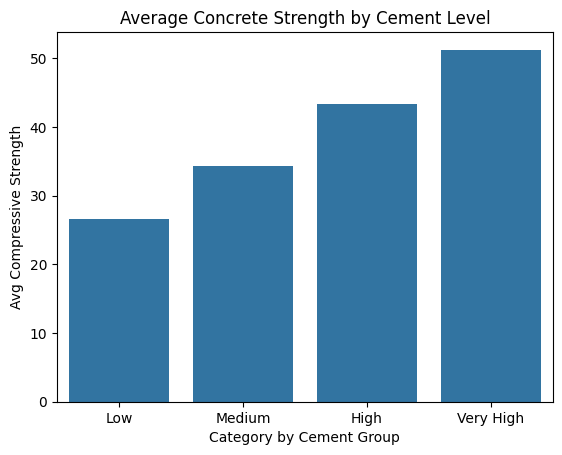

  Cement_Bin  Concrete compressive strength(MPa, megapascals)
0        Low                                        26.546271
1     Medium                                        34.291381
2       High                                        43.285968
3  Very High                                        51.234375


In [43]:
sns.barplot(
    x='Cement_Bin',
    y='Concrete compressive strength(MPa, megapascals)',
    data=avg_cement_strength,
    order=['Low','Medium','High','Very High']
)

plt.title("Average Concrete Strength by Cement Level")
plt.ylabel('Avg Compressive Strength')
plt.xlabel('Category by Cement Group')
plt.show()
print(avg_cement_strength)

In [44]:
#which cement content has the highest median compressive strength

#Rename it as Compressive Strength so it wont be Verbose for us or reader
df.rename(columns={
    'Concrete compressive strength(MPa, megapascals)':'Compressive Strength'
},inplace=True)

#Regrouo it so we can identify 
avg_c_s = df.groupby('Cement_Bin')[['Compressive Strength']].median().reset_index()

h_m_c_st = avg_c_s.nlargest(1,'Compressive Strength')

print()
print(f'{h_m_c_st} has the highest median compressive strength')
print()


  Cement_Bin  Compressive Strength
3  Very High                53.835 has the highest median compressive strength



C:\Users\francis\AppData\Local\Temp\ipykernel_10328\3231867736.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_c_s = df.groupby('Cement_Bin')[['Compressive Strength']].median().reset_index()


C:\Users\francis\AppData\Local\Temp\ipykernel_10328\3065832527.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variability_strength = df.groupby('Cement_Bin')['Compressive Strength']


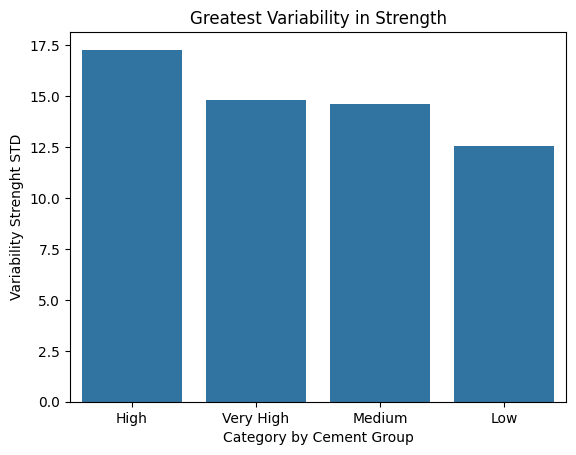

Cement_Bin
High         17.277891
Very High    14.794529
Medium       14.612984
Low          12.569241
Name: Compressive Strength, dtype: float64


In [45]:

#which bin show the greatest variability in strength

variability_strength = df.groupby('Cement_Bin')['Compressive Strength']
variability = variability_strength.std().sort_values(ascending=False)

order = variability.index

variability_df = pd.DataFrame(variability)

sns.barplot(
    x='Cement_Bin',
    y='Compressive Strength',
    data=variability_df,
    order=order
)

plt.title("Greatest Variability in Strength")
plt.ylabel('Variability Strenght STD')
plt.xlabel('Category by Cement Group')
plt.show()
print(variability)

C:\Users\francis\AppData\Local\Temp\ipykernel_10328\258986398.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outliers = df.groupby('Cement_Bin', group_keys=False).apply(find_outliers_IQR).reset_index(drop=True)
C:\Users\francis\AppData\Local\Temp\ipykernel_10328\258986398.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = df.groupby('Cement_Bin', group_keys=False).apply(find_outliers_IQR).reset_index(drop=True)


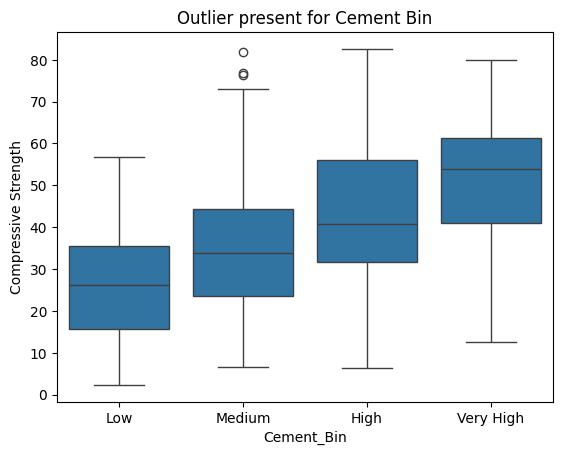

   Compressive Strength Cement_Bin
0                 76.80     Medium
1                 81.75     Medium
2                 76.24     Medium
As we see there are look like 3 or 4 outlier for our bin look like in medium
Let check our lower bound was -7.620000000000001 and our upper bound 75.42


In [ ]:
#find any outlier  Are there any outliers present in any of the cement bins?

medium_group = df[df['Cement_Bin'] == 'Medium']
q1 = medium_group['Compressive Strength'].quantile(0.25)

q3 = medium_group['Compressive Strength'].quantile(0.75)

IQR = q3-q1

lb = q1 - 1.5 * IQR
ub = q3 + 1.5 * IQR


def find_outliers_IQR(df):

   q1=df['Compressive Strength'].quantile(0.25)

   q3=df['Compressive Strength'].quantile(0.75)

   IQR = q3-q1

   lb = q1 - 1.5 * IQR
   ub = q3 + 1.5 * IQR

   outliers = df[
        (df['Compressive Strength'] < lb) |
        (df['Compressive Strength'] > ub)
    ]
   return outliers




outliers = df.groupby('Cement_Bin', group_keys=False).apply(find_outliers_IQR).reset_index(drop=True)
sns.boxplot(x='Cement_Bin',y='Compressive Strength',data=df)
plt.title('Outlier present for Cement Bin')
plt.show()

#lets print any outlier for our cement bin
print(outliers[['Compressive Strength','Cement_Bin']])
print('As we see there are look like 3 or 4 outlier for our bin look like in medium')




#we group our data like this so we cound tell if our Outlier was correct for medium
medium_group = df[df['Cement_Bin'] == 'Medium']
q1 = medium_group['Compressive Strength'].quantile(0.25)

q3 = medium_group['Compressive Strength'].quantile(0.75)

IQR = q3-q1

lb = q1 - 1.5 * IQR
ub = q3 + 1.5 * IQR



print(f'Let check our lower bound was {lb} and our upper bound {ub}')


